In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv("C://Projects//Second Hand car price prediction//archive (1)//train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
data.shape

(1000, 12)

In [4]:
data = data.drop(["v.id","on road now","on road old"],axis = 1)
data.head()

,years,km,rating,condition,economy,top speed,hp,torque,current price
0,3,78945,1,2,14,177,73,123,351318.0
1,6,117220,5,9,9,148,74,95,285001.5
2,2,132538,2,8,15,181,53,97,215386.0
3,4,101065,4,3,11,197,54,116,244295.5
4,6,61559,3,9,12,160,53,105,531114.5


In [5]:
data.columns

Index(['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp',
       'torque', 'current price'],
      dtype='object')

In [6]:
data.isnull().sum()

years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [7]:
data

,years,km,rating,condition,economy,top speed,hp,torque,current price
0,3,78945,1,2,14,177,73,123,351318.0
1,6,117220,5,9,9,148,74,95,285001.5
2,2,132538,2,8,15,181,53,97,215386.0
3,4,101065,4,3,11,197,54,116,244295.5
4,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...
995,5,125092,1,6,11,171,95,97,190744.0
996,4,83370,2,9,14,161,101,120,419748.0
997,7,86722,1,8,9,196,113,89,405871.0
998,2,140478,4,5,9,184,112,128,74398.0


In [8]:
tensor_data = tf.constant(data)
print(tensor_data)

tf.Tensor(
[[3.000000e+00 7.894500e+04 1.000000e+00 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [6.000000e+00 1.172200e+05 5.000000e+00 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [2.000000e+00 1.325380e+05 2.000000e+00 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [7.000000e+00 8.672200e+04 1.000000e+00 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [2.000000e+00 1.404780e+05 4.000000e+00 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [5.000000e+00 6.729500e+04 4.000000e+00 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 9), dtype=float64)


In [9]:
tf.shape(tensor_data)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000,    9])>

In [10]:
tensor_data = tf.cast(tensor_data,tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 9), dtype=float32, numpy=
array([[3.000000e+00, 7.894500e+04, 1.000000e+00, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [6.000000e+00, 1.172200e+05, 5.000000e+00, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [2.000000e+00, 1.325380e+05, 2.000000e+00, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [7.000000e+00, 8.672200e+04, 1.000000e+00, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [2.000000e+00, 1.404780e+05, 4.000000e+00, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [5.000000e+00, 6.729500e+04, 4.000000e+00, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [11]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.000000e+00 1.300040e+05 3.000000e+00 6.000000e+00 1.000000e+01
  1.980000e+02 5.700000e+01 9.900000e+01 2.768055e+05]
 [4.000000e+00 9.886700e+04 2.000000e+00 8.000000e+00 1.500000e+01
  1.960000e+02 5.900000e+01 1.210000e+02 3.873215e+05]
 [7.000000e+00 1.172400e+05 4.000000e+00 9.000000e+00 1.500000e+01
  1.480000e+02 7.300000e+01 7.700000e+01 2.215100e+05]
 [5.000000e+00 9.436500e+04 1.000000e+00 4.000000e+00 8.000000e+00
  1.940000e+02 8.100000e+01 9.500000e+01 3.004995e+05]
 [3.000000e+00 8.769700e+04 4.000000e+00 4.000000e+00 9.000000e+00
  1.970000e+02 9.600000e+01 1.000000e+02 3.667320e+05]], shape=(5, 9), dtype=float32)


In [12]:
X = tensor_data[:,0:-1]
X.shape

TensorShape([1000, 8])

In [13]:
y = tensor_data[:,-1]

In [14]:
tf.shape(y)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000])>

In [15]:
from tensorflow.keras.layers import Normalization

In [16]:
normalizer = Normalization()

In [17]:
normalizer.adapt(X)

In [18]:
X = normalizer(X)

In [19]:
y.shape

TensorShape([1000])

In [20]:
x_mean = normalizer.mean.numpy()
x_mean

array([[4.56099892e+00, 1.00274414e+05, 2.98799968e+00, 5.59200048e+00,
        1.16249981e+01, 1.66892990e+02, 8.45459900e+01, 1.03422989e+02]],
      dtype=float32)

In [21]:
x_std = normalizer.variance.numpy()**0.5
x_std

array([[1.7182196e+00, 2.9135887e+04, 1.4020901e+00, 2.8230367e+00,
        2.2294338e+00, 1.9278728e+01, 2.0506680e+01, 2.1048183e+01]],
      dtype=float32)

In [22]:
Train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(X)

In [23]:
X_train = X[:int(dataset_size*Train_ratio)]
y_train = y[:int(dataset_size*Train_ratio)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800,)


In [24]:
X_val = X[int(dataset_size*Train_ratio):int(dataset_size*(Train_ratio + val_ratio))]
y_val = y[int(dataset_size*Train_ratio):int(dataset_size*(Train_ratio + val_ratio))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100,)


In [25]:
X_test = X[int(dataset_size*(Train_ratio + val_ratio)):]
y_test = y[int(dataset_size*(Train_ratio + val_ratio)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100,)


In [26]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [27]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (8,)),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1)
])

In [28]:
tf.keras.utils.plot_model(model,to_file = "model.png",show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
model.compile(loss = MeanAbsoluteError(), optimizer = Adam(learning_rate = 1),metrics = MeanSquaredError())

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,305
Trainable params: 34,305
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100,verbose = 1) 

Epoch 1/100
25/25 [==============================] - 2s 16ms/step - loss: 181681.6875 - mean_squared_error: 51573669888.0000 - val_loss: 53710.8750 - val_mean_squared_error: 6326109184.0000
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 67689.5078 - mean_squared_error: 7210827264.0000 - val_loss: 42209.2969 - val_mean_squared_error: 2622919936.0000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 49510.4766 - mean_squared_error: 3779257344.0000 - val_loss: 43165.7617 - val_mean_squared_error: 3440394752.0000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 52822.2031 - mean_squared_error: 4238804224.0000 - val_loss: 39192.4805 - val_mean_squared_error: 2540199424.0000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 44850.9297 - mean_squared_error: 3114413824.0000 - val_loss: 44012.6445 - val_mean_squared_error: 3439590912.0000
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

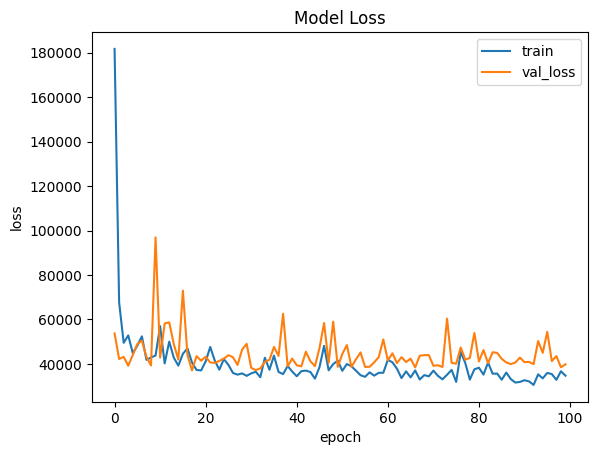

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val_loss"])
plt.show()

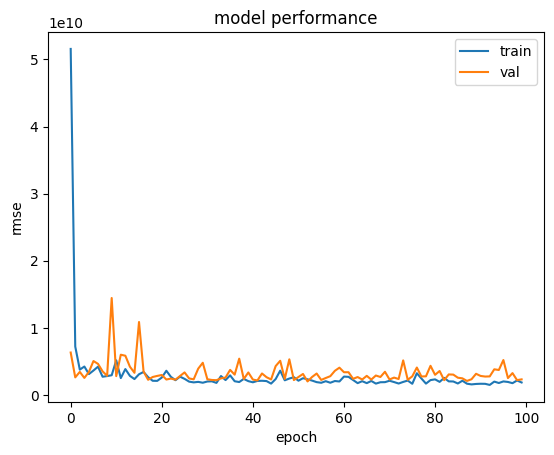

In [33]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [34]:
y_test

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([318858. , 486590. , 397522. , 337257. , 179711.5, 167978.5,
       441865. , 221692. , 555336.5, 354722. , 383875.5, 151080.5,
       219462.5, 508087. , 501920.5, 244229. , 328863. , 414938.5,
       242709.5, 150074. , 350647.5, 456653.5, 360410. , 171620. ,
       132159. , 217446. , 126791.5, 500903. , 265799.5, 456154.5,
       218665.5, 340961.5, 370175. , 354900. , 272437.5, 255901.5,
       136824.5, 266341. , 244295.5, 178642.5, 207480.5, 239214. ,
       278759.5, 499185.5, 401745. , 538075.5, 202503. , 136079. ,
       289049.5, 385031. , 459914.5, 337917. , 342427. ,  61928.5,
        46920.5,  53470.5, 312703. , 381960. , 344405.5, 312323.5,
       528607.5, 239018. , 313619.5, 408203.5, 496514. , 295002. ,
       217562. , 287675. , 421655.5, 401120.5, 237954. , 496671. ,
       146568. , 174399. , 275757. , 333133. , 400027.5, 253055. ,
       467395. , 303506.5, 449650. , 484480.5, 324373. , 400444.5,
       325176.

In [35]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 38094.1875 - mean_squared_error: 2244541696.0000


[38094.1875, 2244541696.0]

In [36]:
X_test.shape

TensorShape([100, 8])

In [37]:
X_test[1]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 1.4194932 , -1.2622377 , -1.417883  ,  1.561439  , -0.72888374,
        0.31677452,  1.1437254 , -1.4929074 ], dtype=float32)>

In [38]:
model.predict(tf.expand_dims(X_test[1], axis = 0 ))

1/1 [==============================] - 0s 108ms/step


array([[476584.97]], dtype=float32)

In [39]:
model.save("car_price_model.h5")

In [40]:
import tensorflow as tf

In [46]:
loaded_model = tf.keras.models.load_model('car_price_model.h5', custom_objects={'MeanSquaredError': tf.keras.losses.MeanSquaredError()})